# 1. Introduction to Julia

[Julia](https://julialang.org/) is a scientific programming language that is free and open source for downloads, documentation, learning resources etc. Bridging high-level interpreted and low-level compiled languages, it offers high performance (comparable to C and Fortran) without sacrificing simplicity and programming productivity (like in Python or R).

Julia has a rich ecosystem of libraries aimed towards scientific computing and a powerful in-built package manager to install and manage their dependencies. Julia is also gaining ground in HPC as it supports both threading and distributed-memory parallelisation as well as GPU computing.

ENCCS provides learning materials for Julia programming:
- [Introduction to programming in Julia](https://enccs.github.io/julia-intro/)
- [Julia for High-Performance Data Analytics](https://enccs.github.io/julia-for-hpda/)
- [Julia for High-Performance Scientific Computing](https://enccs.github.io/julia-for-hpc/)

## Julia was created to solve the two-language problem

To run code in any programming language, some sort of translation into machine instructions (assembly code) needs to take place, but how this translation takes place differs between programming languages:
- Interpreted languages like Python and R translate instructions line by line.
- Compiled languages like C/C++ and Fortran are translated by a compiler prior to running the program.

The benefits of interpreted languages are that they are easier to read and write because less information on aspects like types and array sizes needs to be provided. Programmer productivity is thus higher in interpreted languages, but compiled languages can perform faster by orders of magnitude because the compiler can perform optimizations during the translation to assembly. This is also known as the two-language problem.

In many ways Julia looks like an interpreted language, and mostly behaves like one. But before each function is executed, Julia’s LLVM compiler will compile it `“just in time” (JIT)`. More on that later. Thus you get the flexibility of an interpreted language and the execution speed of the compiled language at the cost of waiting a bit longer for the first execution of any function.

Julia has been designed to be both fast and dynamic. In the words of its developers: `We want a language that’s open source, with a liberal license. We want the speed of C with the dynamism of Ruby. We want a language that’s homoiconic, with true macros like Lisp, but with obvious, familiar mathematical notation like Matlab. We want something as usable for general programming as Python, as easy for statistics as R, as natural for string processing as Perl, as powerful for linear algebra as Matlab, as good at gluing programs together as the shell. Something that is dirt simple to learn, yet keeps the most serious hackers happy. We want it interactive and we want it compiled. (Did we mention it should be as fast as C?)`.

## Julia Micro-Benchmarks

<div>
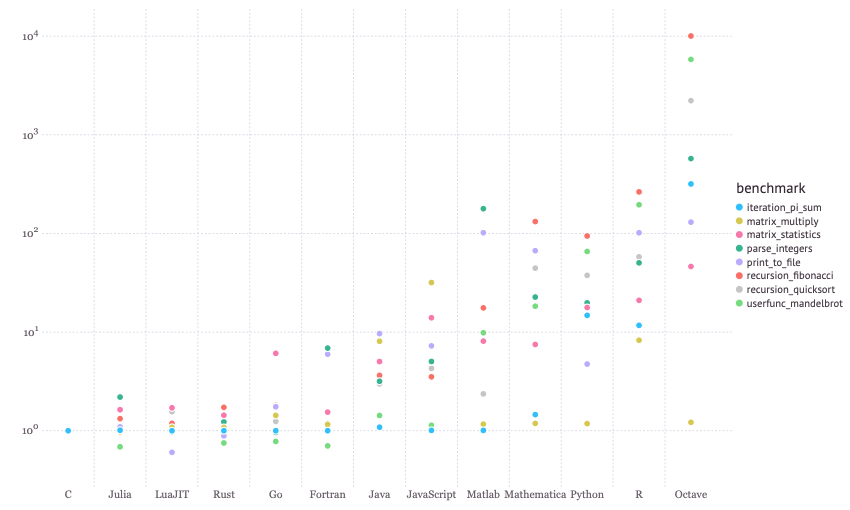
</div>

# 2. Basic syntax

## Scalars

In [1]:
A = 3.14
println(A, " --- ", typeof(A))

B = 10
println(B, " --- ", typeof(B))

C = true
println(C, " --- ", typeof(C))

D = 3+4im
println(D, " --- ", typeof(D))

E = "hello, Julia"
println(E, " --- ", typeof(E))

# supertypes and subtypes
print(supertypes(Float64), " --- ", subtypes(Int64))

3.14 --- Float64
10 --- Int64
true --- Bool
3 + 4im --- Complex{Int64}
hello, Julia --- String
(Float64, AbstractFloat, Real, Number, Any) --- Type[]

## Vectors and Arrays

In [2]:
a1 = [1, 2, 3, 4] # 4-element Vector{Int64}
a2 = [i^3 for i in [1,2,3,4]] # Array comprehension

m1 = [[1,2]  [4,5]  [7,8]] # 2×3 Matrix{Int64}
m2 = zeros(4,4,4,4) # Zero 4×4×4×4 Array{Float64, 4}

# broadcasting
b1 = a1.^2
b2 = a2 .- a1

4-element Vector{Int64}:
  0
  6
 24
 60

## Loops and Conditionals

`for` loops iterate over iterables, including types like `Range`, `Array`, `Set` and `Dict`.

In [3]:
for i in [1,2,3,4,5]
    println("i = $i")
end

i = 1
i = 2
i = 3
i = 4
i = 5


In [4]:
A = [1 2; 3 4]
# visit each index of A efficiently
for i in eachindex(A)
    println("i = $i, A[i] = $(A[i])")
end

i = 1, A[i] = 1
i = 2, A[i] = 3
i = 3, A[i] = 2
i = 4, A[i] = 4


In [5]:
for (k, v) in Dict("A" => 1, "B" => 2, "C" => 3)
    println("$k is $v")
end

B is 2
A is 1
C is 3


In [6]:
x = 6
if x > 5
    println("x > 5")
elseif x < 5    # optional elseif
    println("x < 5")
else            # optional else
    println("x = 5")
end

x > 5


In [7]:
n = 0
while n < 10
    n += 1
    println(n)
end

1
2
3
4
5
6
7
8
9
10


## Working with files

In [8]:
open("myfile.txt", "w") do f
    write(f, "another line")
end

open("myfile.txt") do f
    # read from file
    lines = readlines(f)
    println(lines)
end

["another line"]


## Functions

In [9]:
function f(x,y)
    x + y   # can also use "return" keyword
end

f(3, 5)

8

In [10]:
## Keyword arguments can be added after `;`

function greet_dog(; greeting = "Hi", dog_name = "Fido")  # note the ;
    println("$greeting $dog_name")
end

greet_dog(dog_name = "Coco", greeting = "Go fetch")

Go fetch Coco


In [11]:
# Optional arguments

function date(y, m=2, d=2)
    month = lpad(m, 2, "0")  # lpad pads from the left
    day = lpad(d, 2, "0")
    println("$y-$month-$day")
end

date(2024)
date(2024, 3)
date(2024, 3, 3)

2024-02-02
2024-03-02
2024-03-03


In [12]:
# argument types can be specified explicitly
function f(x::Float64, y::Float64)
    return x*y
end

# return types can also be specified
function g(x, y)::Int8
    return x * y
end

g (generic function with 1 method)

# 3. Special features of Julia

## Hierarchy Types

Julia is a dynamically typed language and does not require users to explicitly declare types because types are inferred and used at runtime. The sophisticated type system helps Julia to generate efficient code.

As types play a fundamental role in Julia’s design, it’s important to have a mental model of Julia’s type system. There are two basic kinds of types in Julia:
- Abstract types which define the kind of a thing, that is, represent sets of related types.
- Concrete types which describe data structures, that is, concrete implementations that can be used for variables.

Furthermore, a **primitive type** consists of plain bits such as an integer, character or floating point number. A **parametric type** represents a set of types. Types in Julia form a “type tree”, in which the leaves are concrete types.

<div>
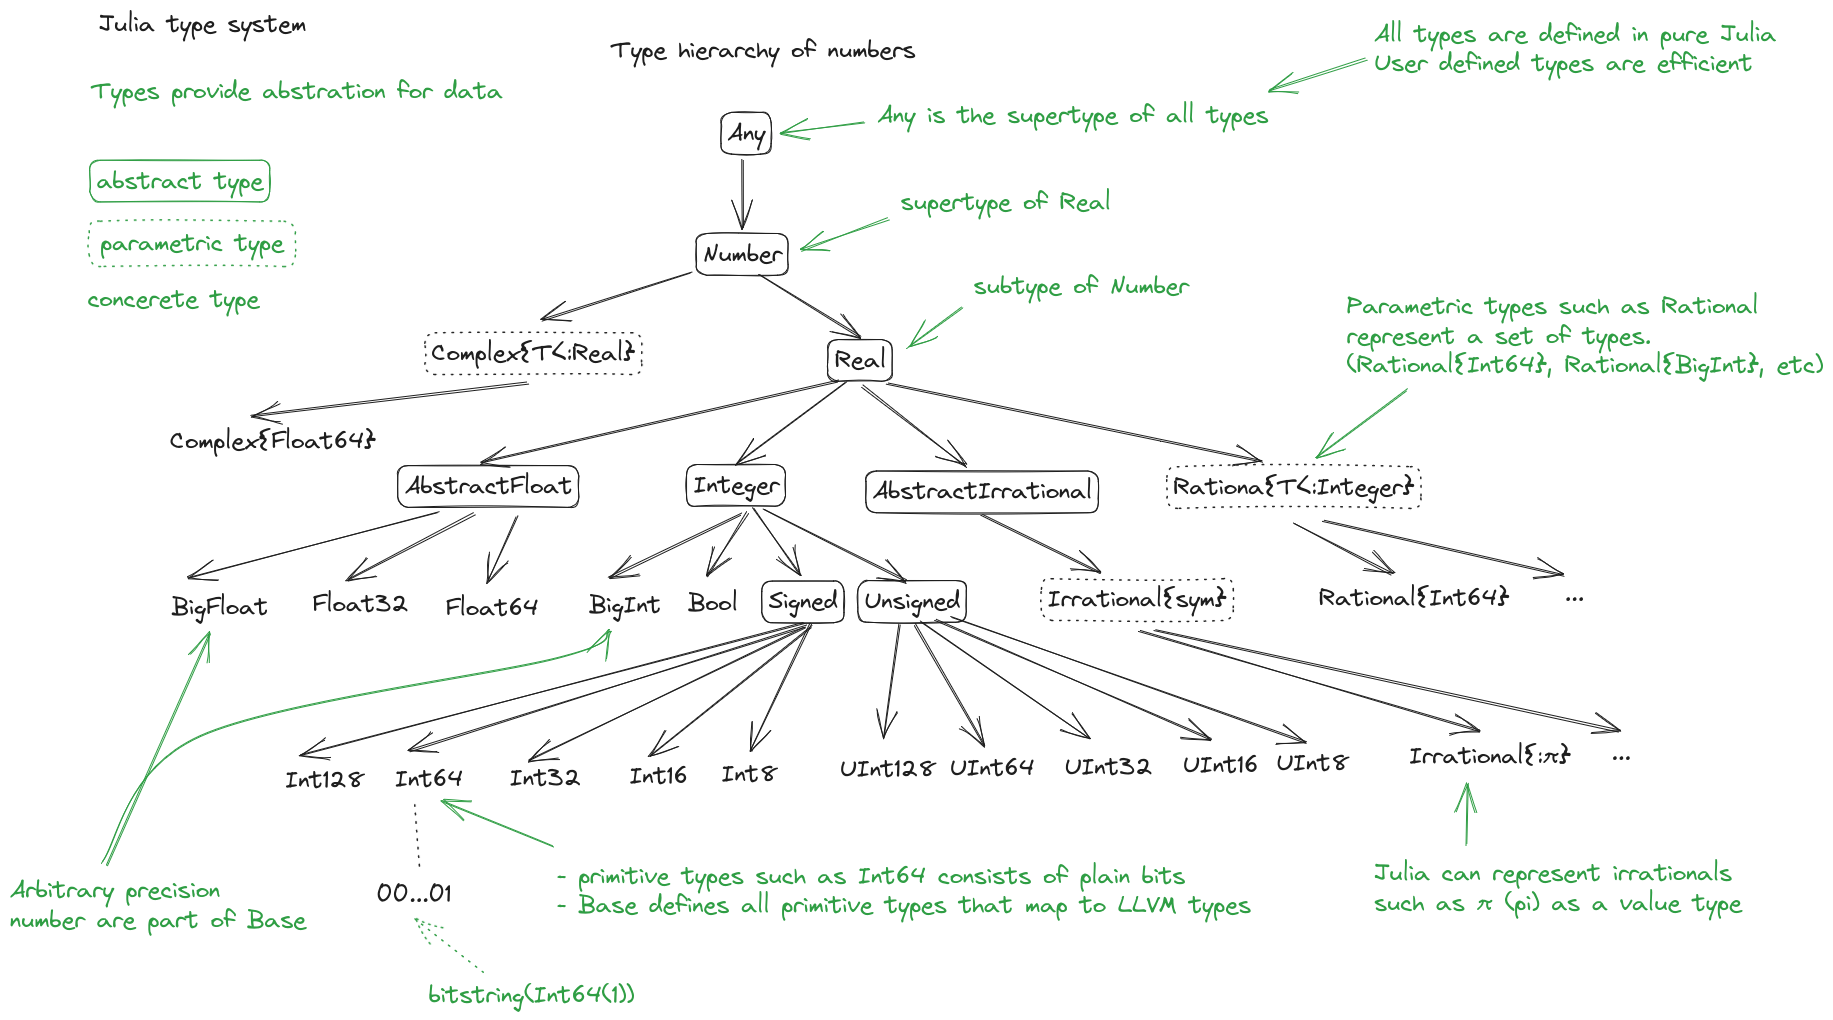
</div>

## Functions and Methods

In [13]:
function sumsquare(x, y)
    return x^2 + y^2
end

sumsquare (generic function with 1 method)

Each function can have multiple methods. A method is a function defined for specific arguments types.
Here we define methods using short form syntax.

In [14]:
sumsquare(x::Float64, y::Float64) = x^2 + y^2
sumsquare(x::Int64, y::Int64) = x^2 + y^2
sumsquare(x::Complex{Float64}, y::Complex{Float64}) = x^2 + y^2

sumsquare (generic function with 4 methods)

Julia’s type system also enables `multiple dispatch`, that is, choosing the most specific method of a function based on the argument types. 

`Multiple dispatch` sets the language apart from most other languages and makes it composable and fast when combined with just-in-time (JIT) compilation using the LLVM compiler toolchain.

In [15]:
# Passing arguments with all kinds of types to this function

# Int64
println(sumsquare(2, 3))

# Float64
println(sumsquare(2.72, 3.83))
    
# Complex{Float64}
println(sumsquare(1.2+2.3im, 2.1-1.5im))

13
22.067300000000003
-1.689999999999999 - 0.7800000000000011im


We can also create a composite type (a struct), and create a new method for that type. The `Point2D` composite type below is furthermore *parametric*, where we restrict the type T to be a subtype of `Real`:


In [16]:
struct Point{T<:Real}
    x::T
    y::T
end

We can now create two variables of type `Point2D`, and define a method for `sumsquare` which accepts this type:

In [17]:
p1, p2 = Point(1.0, 2.0), Point(2.0, 3.0)

function sumsquare(p1::Point, p2::Point)
   return Point(p1.x^2 + p2.x^2, p1.y^2 + p2.y^2)
end

sumsquare(p1, p2)  


Point{Float64}(5.0, 13.0)

## Code generation

Julia was designed from the beginning for HPC and this is accomplished by compiling Julia programs to efficient native code for multiple platforms via the `LLVM` compiler toolchain and `JIT` compilation. The Julia runtime code generator produces an LLVM **Intermediate Representation** (IR) which the LLMV compiler then converts to machine code using sophisticated optimization technology
- Interpreted languages rely on a runtime which directly executes the source code.
- Compiled languages rely on ahead-of-time compilation where source code is converted to an executable before execution.
- JIT compilation is when code is compiled to machine code at runtime.

<div>
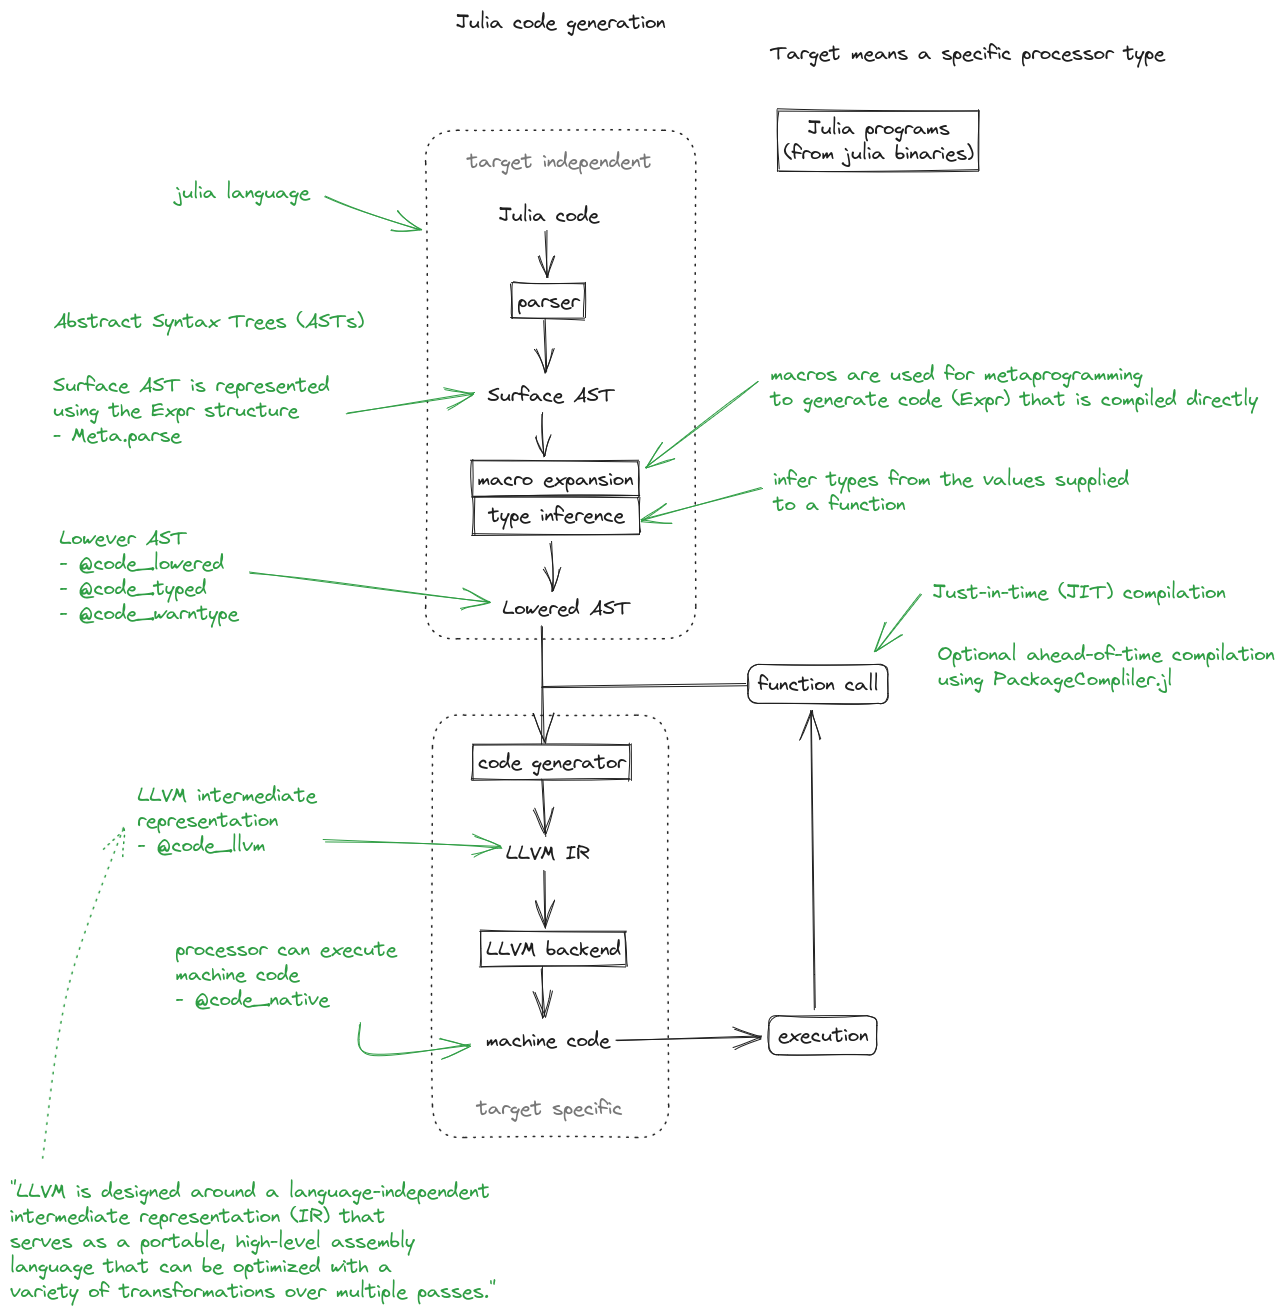
</div>

To see the various forms of lowered code that is generated by the JIT compiler we can use several macros. Inspecting the lowered form for functions requires selection of the specific method to display, because generic functions may have many methods with different type signatures.

In [18]:
# Surface level AST
Meta.parse("sumsquare(1, 2)") |> dump
Meta.parse("sumsquare(p1, p2)") |> dump

# Lowered form of AST
@code_lowered sumsquare(1, 2)
@code_lowered sumsquare(p1, p2)

# Type-inferred lowered form of AST
@code_typed sumsquare(1, 2)
@code_typed sumsquare(1.0, 2.0)
@code_typed sumsquare(p1, p2)

# Lowered and type-inferred ASTs
@code_warntype sumsquare(1.0, 2.0)
@code_warntype sumsquare(p1, p2)

# LLVM intermediate representation:
@code_llvm sumsquare(1, 2)
@code_llvm sumsquare(1.0, 2.0)
@code_llvm sumsquare(p1, p2)

# native assembly instructions:
@code_native sumsquare(1, 2)
@code_native sumsquare(1.0, 2.0)
@code_native sumsquare(p1, p2)

Expr
  head: Symbol call
  args: Array{Any}((3,))
    1: Symbol sumsquare
    2: Int64 1
    3: Int64 2
Expr
  head: Symbol call
  args: Array{Any}((3,))
    1: Symbol sumsquare
    2: Symbol p1
    3: Symbol p2
MethodInstance for sumsquare(::Float64, ::Float64)
  from sumsquare(x::Float64, y::Float64) @ Main In[14]:1
Arguments
  #self#::Core.Const(sumsquare)
  x::Float64
  y::Float64
Body::Float64
1 ─ %1 = Main.:^::Core.Const(^)
│   %2 = Core.apply_type(Base.Val, 2)::Core.Const(Val{2})
│   %3 = (%2)()::Core.Const(Val{2}())
│   %4 = Base.literal_pow(%1, x, %3)::Float64
│   %5 = Main.:^::Core.Const(^)
│   %6 = Core.apply_type(Base.Val, 2)::Core.Const(Val{2})
│   %7 = (%6)()::Core.Const(Val{2}())
│   %8 = Base.literal_pow(%5, y, %7)::Float64
│   %9 = (%4 + %8)::Float64
└──      return %9

MethodInstance for sumsquare(::Point{Float64}, ::Point{Float64})
  from sumsquare(p1::Point, p2::Point) @ Main In[17]:3
Arguments
  #self#::Core.Const(sumsquare)
  p1::Point{Float64}
  p2::Point{Float64

## Metaprogramming

Julia represents its own code as a data structure accessible from the language itself. Since code is represented by objects that can be created and manipulated from within the language, it is possible for a program to transform and generate its own code, that is to create powerful macros (the term "metaprogramming" refers to the possibility to write code that writes code that is then evaluated).

Note the difference from C or C++ macros. There, macros work performing textual manipulation and substitution before any actual parsing or interpretation occurs.

In Julia, macros work when the code has already been parsed and organised in a syntax tree, and hence the semantic is much richer and allows for much more powerful manipulations.

More reading materials for the metaprogramming
- [Documentation on metaprogramming](https://docs.julialang.org/en/v1/manual/metaprogramming/)
- [Metaprogramming tutorial from JuliaCon21](https://github.com/dpsanders/Metaprogramming_JuliaCon_2021)

# 4. GPU programming using Julia

Julia has first-class support for GPU programming through the following packages that target GPUs from all major vendors:
- [CUDA.jl](https://cuda.juliagpu.org/stable/) for NVIDIA GPUs
- [AMDGPU.jl](https://amdgpu.juliagpu.org/stable/) for AMD GPUs
- [oneAPI.jl](https://github.com/JuliaGPU/oneAPI.jl) for Intel GPUs
- [Metal.jl](https://github.com/JuliaGPU/Metal.jl) for Apple M-series GPUs

ENCCS reading materials:
- [GPU Programming: When, Why and How?](https://enccs.github.io/gpu-programming/6-language-support/#julia)
- [Julia for High-Performance Scientific Computing](https://enccs.github.io/julia-for-hpc/GPU/)
- [Julia for High-Performance Data Analytics](https://enccs.github.io/julia-for-hpda/)

## Setup and Access to GPUs

In [19]:
using Pkg
Pkg.add("Metal")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


## The Array interface

GPU programming with Julia can be as simple as using a different array type instead of regular Base.

For Apple M-series GPUs, it should use `MtlArray` from `Metal.jl`.

In [20]:
using Metal

# copy an array to GPU and executes a simple operation on GPU
A_d = MtlArray([1,2,3,4])
A_d .+= 1

# fetch data from GPU to CPU
A = Array(A_d) # the overhead of copying data to GPU makes such simple calculations very slow

4-element Vector{Int64}:
 2
 3
 4
 5

In [21]:
# A code example for matrix multiplication

using BenchmarkTools
using Metal

A = rand(Float32, 2^9, 2^9); # Float64 does not work for Mac GPU
A_d = MtlArray(A);

@btime $A * $A;

@btime Metal.@sync $A_d * $A_d;

  913.125 μs (2 allocations: 1.00 MiB)
  419.500 μs (75 allocations: 1.94 KiB)


## Writing your own kernels

In [22]:
# an example of vector addition kernel for Apple GPU

function vadd!(C, A, B)
    for i in 1:length(A)
        @inbounds C[i] = A[i] + B[i]
    end
end

A = zeros(10) .+ 5.0;
B = ones(10);
C = similar(B);
vadd!(C, A, B)

In [23]:
A_d = MtlArray(Float32.(A));
B_d = MtlArray(Float32.(B));
C_d = similar(B_d);

@metal vadd!(C_d, A_d, B_d)

Metal.HostKernel{typeof(vadd!), Tuple{MtlDeviceVector{Float32, 1}, MtlDeviceVector{Float32, 1}, MtlDeviceVector{Float32, 1}}}(vadd!, Metal.MTL.MTLComputePipelineStateInstance (object of type AGXG14GFamilyComputePipeline))

**NOTE**: the performance would be terrible because each thread on the GPU would be performing the same loop! So we have to remove the loop over all elements and instead use the special `threadIdx` and `blockDim` functions, analogous respectively to `threadid` and `nthreads` for multithreading.

In [24]:
function vadd!(C, A, B)
    index = thread_position_in_grid_1d()
    @inbounds C[index] = A[index] + B[index]
    return
end

A = MtlArray(Float32.(ones(Float32, 2^9)*2));
B = MtlArray(Float32.(ones(Float32, 2^9)*3));
C = similar(A);

N = length(A)
println("length of matrix A = ", N)
@metal threads=N vadd!(C, A, B)

@assert all(Array(C) .== 5.0)

length of matrix A = 512


However, this implementation will not scale up to arrays that are larger than the maximum number of threads in a block! We can find out how many threads are supported on the GPU we are using:

Clearly, GPUs have a limited number of threads they can run on a single SM. To parallelise over multiple SMs we need to run a kernel with multiple blocks where we also take advantage of the `blockDim()` and `blockIdx()` functions (in the case of NVIDIA).

In [25]:
function vadd!(C, A, B)
    i = thread_position_in_grid_1d()
    if i <= length(A)
        @inbounds C[i] = A[i] + B[i]
    end
    return
end

A = MtlArray(Float32.(ones(Float32, 2^9)*2));
B = MtlArray(Float32.(ones(Float32, 2^9)*3));
C = similar(A);

nthreads = 128
numblocks = cld(length(A), nthreads)
println("nthreads = ", nthreads, ", numblocks = ", numblocks)

# run using 128 threads
@metal threads=nthreads groups=numblocks vadd!(C, A, B)

@assert all(Array(C) .== 5.0)

nthreads = 128, numblocks = 4


**Restrictions in kernel programming**

Within kernels, most of the Julia language is supported with the exception of functionality that requires the Julia runtime library. This means one cannot allocate memory or perform dynamic function calls, both of which are easy to do accidentally!

# 5. Julia packages for machine learning

The `MLJ.jl` (https://github.com/alan-turing-institute/MLJ.jl) package provides a unified interface to common machine learning algorithms, which include `generalized linear models`, `decision trees`, and `clustering`.

`Flux.jl` (https://github.com/FluxML/Flux.jl) and `Knet.jl` (https://github.com/denizyuret/Knet.jl) are powerful packages for Deep Learning.

Packages such as `Metalhead.jl`(https://github.com/FluxML/Metalhead.jl), `ObjectDetector.jl`(https://github.com/r3tex/ObjectDetector.jl), and `TextAnalysis.jl`(https://github.com/JuliaText/TextAnalysis.jl) provide ready to use pre-trained models for common tasks.

`AlphaZero.jl`(https://github.com/jonathan-laurent/AlphaZero.jl) provides a high performance implementation of the reinforcement learning algorithms from AlphaZero.

`Turing.jl`(https://turinglang.org/stable/) is a best in class package for probabilistic programming.

More packages for AI & ML from Julia official website
- ML: https://juliapackages.com/c/machine-learning
- NLP: https://juliapackages.com/c/nlp
- Neural Networks: https://juliapackages.com/c/neural-networks
- Reinforcement Learning: https://juliapackages.com/c/reinforcement-learning
- Supervised Learning: https://juliapackages.com/c/supervised-learning

### Training a deep neural network to classify penguins using `Flux.jl`

Flux.jl comes “batteries-included” with many useful tools built in, but also enables the user to write own Julia code for DL components.
- Flux has relatively few explicit APIs for features like regularisation or embeddings.
- All of Flux is straightforward Julia code and it can be worth to inspect and extend it if needed.
- Flux works well with other Julia libraries, like dataframes, images and differential equation solvers. One can build complex data processing pipelines that integrate Flux models.

To train a model we need four things:
- A collection of data points that will be provided to the objective function.
- A objective (cost or loss) function, that evaluates how well a model is doing given some input data.
- The definition of a model and access to its trainable parameters.
- An optimiser that will update the model parameters appropriately.

In [26]:
using Pkg

Pkg.add("PalmerPenguins")
using PalmerPenguins

Pkg.add("Flux")
using Flux

Pkg.add("MLJ")
Pkg.add("DataFrames")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [27]:
using MLJ: partition, ConfusionMatrix
using DataFrames

table = PalmerPenguins.load()
df = DataFrame(table)
dropmissing!(df)

Row,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
,String15,String15,Float64,Float64,Int64,Int64,String7
1,Adelie,Torgersen,39.1,18.7,181,3750,male
2,Adelie,Torgersen,39.5,17.4,186,3800,female
3,Adelie,Torgersen,40.3,18.0,195,3250,female
4,Adelie,Torgersen,36.7,19.3,193,3450,female
5,Adelie,Torgersen,39.3,20.6,190,3650,male
6,Adelie,Torgersen,38.9,17.8,181,3625,female
7,Adelie,Torgersen,39.2,19.6,195,4675,male
8,Adelie,Torgersen,41.1,17.6,182,3200,female
9,Adelie,Torgersen,38.6,21.2,191,3800,male


We can now preprocess our dataset to make it suitable for training a network:

In [28]:
# select feature and label columns
X = select(df, Not([:species, :sex, :island]))
Y = df[:, :species]

# split into training and testing parts
(xtrain, xtest), (ytrain, ytest) = partition((X, Y), 0.8, shuffle=true, rng=123, multi=true)

# use single precision and transpose arrays
xtrain, xtest = Float32.(Array(xtrain)'), Float32.(Array(xtest)')

# one-hot encoding
ytrain = Flux.onehotbatch(ytrain, ["Adelie", "Gentoo", "Chinstrap"])
ytest = Flux.onehotbatch(ytest, ["Adelie", "Gentoo", "Chinstrap"])

# count penguin classes to see if it's balanced
sum(ytrain, dims=2)
sum(ytest, dims=2)

3×1 Matrix{Int64}:
 30
 25
 12

Next up is the loss function which will be minimized during the training. We also define another function which will give us the accuracy of the model:

In [29]:
# we use the cross-entropy loss function typically used for classification
loss(x, y) = Flux.crossentropy(model(x), y)

# onecold (opposite to onehot) gives back the original representation
function accuracy(x, y)
    return sum(Flux.onecold(model(x)) .== Flux.onecold(y)) / size(y, 2)
end

accuracy (generic function with 1 method)

`model` will be our neural network, so we go ahead and define it:

In [30]:
n_features, n_classes, n_neurons = 4, 3, 10
model = Chain(
        Dense(n_features, n_neurons, sigmoid),
        Dense(n_neurons, n_classes),
        softmax)

Chain(
  Dense(4 => 10, σ),                    # 50 parameters
  Dense(10 => 3),                       # 33 parameters
  NNlib.softmax,
)                   # Total: 4 arrays, 83 parameters, 588 bytes.

We now define an anonymous callback function to pass into the training function to monitor the progress, select the standard ADAM optimizer, and extract the parameters of the model:

In [31]:
callback = () -> @show(loss(xtrain, ytrain))
opt = ADAM()
θ = Flux.params(model)

Params([Float32[0.10607953 0.5135649 0.6355545 -0.5202714; 0.64276236 -0.3949629 0.16110156 0.46208572; … ; -0.43631604 -0.37389666 0.018143706 0.42039728; 0.36533558 0.34019193 -0.07811556 0.34053853], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[-0.013752525 0.055922657 … 0.50524163 0.010760549; 0.33926603 -0.47418562 … 0.09731394 -0.31661507; -0.017942537 -0.60156727 … -0.19871958 -0.38625157], Float32[0.0, 0.0, 0.0]])

Before training the model, let’s have a look at some initial predictions and the accuracy:

In [32]:
# predictions before training
model(xtrain[:,1:5])
ytrain[:,1:5]
# accuracy before training
accuracy(xtrain, ytrain)
accuracy(xtest, ytest)

0.44776119402985076

Finally we are ready to train the model. Let’s run 100 epochs:

In [33]:
# the training data and the labels can be passed as tuples to train!
for i in 1:10
    Flux.train!(loss, θ, [(xtrain, ytrain)], opt, cb = Flux.throttle(callback, 1))
end

# check final accuracy
accuracy(xtrain, ytrain)
accuracy(xtest, ytest)

loss(xtrain, ytrain) = 1.5726907f0
loss(xtrain, ytrain) = 1.566699f0
loss(xtrain, ytrain) = 1.5607305f0
loss(xtrain, ytrain) = 1.554787f0
loss(xtrain, ytrain) = 1.548869f0
loss(xtrain, ytrain) = 1.5429775f0
loss(xtrain, ytrain) = 1.5371121f0
loss(xtrain, ytrain) = 1.5312743f0
loss(xtrain, ytrain) = 1.5254648f0
loss(xtrain, ytrain) = 1.5196829f0


0.44776119402985076

We finally create a confusion matrix to quantify the performance of the model:

In [34]:
predicted_species = Flux.onecold(model(xtest), ["Adelie", "Gentoo", "Chinstrap"])
true_species = Flux.onecold(ytest, ["Adelie", "Gentoo", "Chinstrap"])
ConfusionMatrix()(predicted_species, true_species)

          ┌─────────────────────────────┐
          │        Ground Truth         │
┌─────────┼─────────┬─────────┬─────────┤
│Predicted│ Adelie  │Chinstrap│ Gentoo  │
├─────────┼─────────┼─────────┼─────────┤
│ Adelie  │   30    │   12    │   25    │
├─────────┼─────────┼─────────┼─────────┤
│Chinstrap│    0    │    0    │    0    │
├─────────┼─────────┼─────────┼─────────┤
│ Gentoo  │    0    │    0    │    0    │
└─────────┴─────────┴─────────┴─────────┘
